In [1]:
#importing the dataset
import pandas as pd
import math
%matplotlib inline

data = pd.read_csv('transformed_data.csv')


In [2]:
#transforming the day column - from a String to an Int

def day_column():
    day = []
    for index, row in data.iterrows():
        if(row['day'] == "Monday"):
            day.append(1)
        elif (row['day'] == "Tuesday"):
            day.append(2)
        elif (row['day'] == "Wednesday"):
            day.append(3)
        elif (row['day'] == "Thursday"):
            day.append(4)
        elif (row['day'] == "Saturday"):
            day.append(6)
        elif (row['day'] == "Sunday"):
            day.append(7)
    data["day"] = day

day_column()
data.head(5)

,team,targeted_productivity,smv,wip,over_time,incentive,idle_time,idle_men,no_of_style_change,no_of_workers,department_finishing,actual_productivity,day,quarter_num,department,idle_time?,idle_men?
0,9,0.75,3.94,0.0,960,0,0.0,0,0,8,0,0.755167,3,1,finishing,False,False
1,7,0.65,30.10,909.0,7080,0,0.0,0,1,59,0,0.535678,4,2,sweing,False,False
2,3,0.80,4.15,0.0,1440,0,0.0,0,0,7,1,0.820833,3,2,finishing,False,False
3,1,0.65,22.53,762.0,5040,0,0.0,0,1,42,0,0.581131,3,4,sweing,False,False
4,4,0.70,30.10,767.0,3300,50,0.0,0,1,57,0,0.790003,1,2,sweing,False,False


In [3]:
#transforming the department column - from a String to an Int

def department_column():
    department = []
    for index, row in data.iterrows():
        if(row['department'] == "finishing"):
            department.append(1)
        elif (row['department'] == "sweing"):
            department.append(2)

    data["department"] = department

department_column()
data.head(5)

,team,targeted_productivity,smv,wip,over_time,incentive,idle_time,idle_men,no_of_style_change,no_of_workers,department_finishing,actual_productivity,day,quarter_num,department,idle_time?,idle_men?
0,9,0.75,3.94,0.0,960,0,0.0,0,0,8,0,0.755167,3,1,1,False,False
1,7,0.65,30.10,909.0,7080,0,0.0,0,1,59,0,0.535678,4,2,2,False,False
2,3,0.80,4.15,0.0,1440,0,0.0,0,0,7,1,0.820833,3,2,1,False,False
3,1,0.65,22.53,762.0,5040,0,0.0,0,1,42,0,0.581131,3,4,2,False,False
4,4,0.70,30.10,767.0,3300,50,0.0,0,1,57,0,0.790003,1,2,2,False,False


In [4]:
#transforming the idle_time? column - from True/False to 1/0

def idle_time_column():
    time = []
    for index, row in data.iterrows():
        if(row['idle_time?'] == False):
            time.append(0)
        elif (row['idle_time?'] == True):
            time.append(1)

    data["idle_time?"] = time

idle_time_column()
data.head(5)

,team,targeted_productivity,smv,wip,over_time,incentive,idle_time,idle_men,no_of_style_change,no_of_workers,department_finishing,actual_productivity,day,quarter_num,department,idle_time?,idle_men?
0,9,0.75,3.94,0.0,960,0,0.0,0,0,8,0,0.755167,3,1,1,0,False
1,7,0.65,30.10,909.0,7080,0,0.0,0,1,59,0,0.535678,4,2,2,0,False
2,3,0.80,4.15,0.0,1440,0,0.0,0,0,7,1,0.820833,3,2,1,0,False
3,1,0.65,22.53,762.0,5040,0,0.0,0,1,42,0,0.581131,3,4,2,0,False
4,4,0.70,30.10,767.0,3300,50,0.0,0,1,57,0,0.790003,1,2,2,0,False


In [5]:
#transforming the idle_men? column - from True/False to 1/0

def idle_men_column():
    men = []
    for index, row in data.iterrows():
        if(row['idle_men?'] == False):
            men.append(0)
        elif (row['idle_men?'] == True):
            men.append(1)

    data["idle_men?"] = men

idle_men_column()
data.head(5)

,team,targeted_productivity,smv,wip,over_time,incentive,idle_time,idle_men,no_of_style_change,no_of_workers,department_finishing,actual_productivity,day,quarter_num,department,idle_time?,idle_men?
0,9,0.75,3.94,0.0,960,0,0.0,0,0,8,0,0.755167,3,1,1,0,0
1,7,0.65,30.10,909.0,7080,0,0.0,0,1,59,0,0.535678,4,2,2,0,0
2,3,0.80,4.15,0.0,1440,0,0.0,0,0,7,1,0.820833,3,2,1,0,0
3,1,0.65,22.53,762.0,5040,0,0.0,0,1,42,0,0.581131,3,4,2,0,0
4,4,0.70,30.10,767.0,3300,50,0.0,0,1,57,0,0.790003,1,2,2,0,0


In [6]:
#import statements

import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import accuracy_score
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
from sklearn import tree
import matplotlib.pyplot as plt

In [7]:
X = pd.concat((data.iloc[:, 0:11], data.iloc[:, 12:]), axis=1)
X.head(5)

,team,targeted_productivity,smv,wip,over_time,incentive,idle_time,idle_men,no_of_style_change,no_of_workers,department_finishing,day,quarter_num,department,idle_time?,idle_men?
0,9,0.75,3.94,0.0,960,0,0.0,0,0,8,0,3,1,1,0,0
1,7,0.65,30.10,909.0,7080,0,0.0,0,1,59,0,4,2,2,0,0
2,3,0.80,4.15,0.0,1440,0,0.0,0,0,7,1,3,2,1,0,0
3,1,0.65,22.53,762.0,5040,0,0.0,0,1,42,0,3,4,2,0,0
4,4,0.70,30.10,767.0,3300,50,0.0,0,1,57,0,1,2,2,0,0


In [8]:
#y holds the target

y = data[['actual_productivity']]
y.head(5)

,actual_productivity
0,0.755167
1,0.535678
2,0.820833
3,0.581131
4,0.790003


In [9]:
#splitting the data into 30% testing and 70% training

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=100)

In [10]:
#initiating the model with 100 decision trees and training the model for the traininf dataset

rf = RandomForestRegressor(n_estimators = 1000, random_state = 42)
rf.fit(X_train, y_train)

c:\Users\Johana Papa\anaconda3\Lib\site-packages\sklearn\base.py:1151: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


RandomForestRegressor(n_estimators=1000, random_state=42)

In [11]:
# predicting the values for the testing dataset

y_pred = rf.predict(X_test)

y_pred_final = pd.DataFrame(y_pred)

#computing the mean squared error 

rmse = float(format(np.sqrt(mean_squared_error(y_test, y_pred)), '.3f'))
print("\nRMSE: ", rmse)
mse = mean_squared_error(y_test, y_pred)
print("\nMSE: ", mse)
r2 = r2_score(y_test, y_pred)
print("\nR2_Score ", r2)



RMSE:  0.117

MSE:  0.013643819261412594

R2_Score  0.5610929248026606


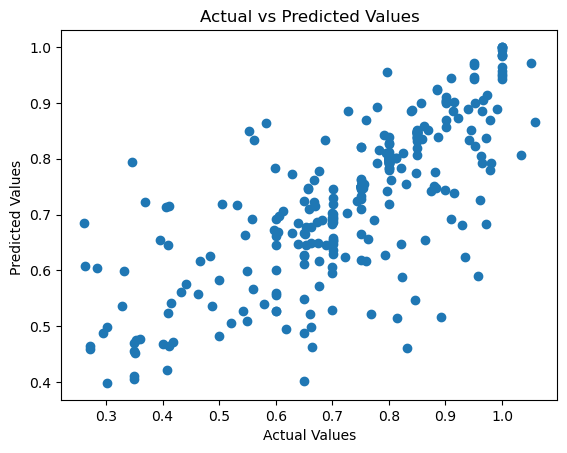

In [21]:
plt.scatter(y_test, y_pred, alpha=1)
plt.xlabel("Actual Values")
plt.ylabel("Predicted Values ")
plt.title("Actual vs Predicted Values")
plt.show()

In [12]:
# Define the hyperparameter grid
param_grid = {
    'n_estimators': [100, 500, 1000],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Instantiate the grid search model for 3 folds 
grid_search = GridSearchCV(estimator = RandomForestRegressor(random_state = 42),
                           param_grid = param_grid, cv = 3, n_jobs = -1, verbose = 2)

# Fit the grid search to the data
grid_search.fit(X_train, y_train)

# Print the best parameters found by the grid search
print("Best Parameters:", grid_search.best_params_)

# Use the best estimator for predictions
best_rf = grid_search.best_estimator_
y_pred_tuned = best_rf.predict(X_test)

Fitting 3 folds for each of 108 candidates, totalling 324 fits


c:\Users\Johana Papa\anaconda3\Lib\site-packages\sklearn\base.py:1151: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


Best Parameters: {'max_depth': None, 'min_samples_leaf': 4, 'min_samples_split': 10, 'n_estimators': 100}


In [13]:
rmse_improved = np.sqrt(mean_squared_error(y_test, y_pred_tuned))
mse_improved = mean_squared_error(y_test, y_pred_tuned)
r2_improved = r2_score(y_test, y_pred_tuned)

print("\nTuned Model Performance:")
print("RMSE: ", rmse_improved)
print("MSE: ", mse_improved)
print("R2 Score: ", r2_improved)


Tuned Model Performance:
RMSE:  0.11420082493949701
MSE:  0.013041828416861643
R2 Score:  0.5804583265142397


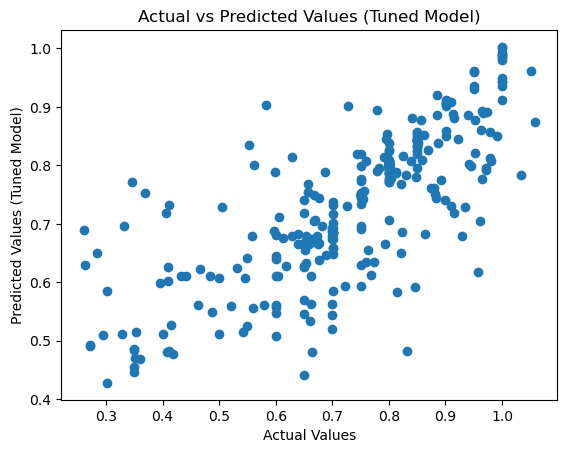

In [19]:
plt.scatter(y_test, y_pred_tuned, alpha=1)
plt.xlabel("Actual Values")
plt.ylabel("Predicted Values (Tuned Model)")
plt.title("Actual vs Predicted Values (Tuned Model)")
plt.show()

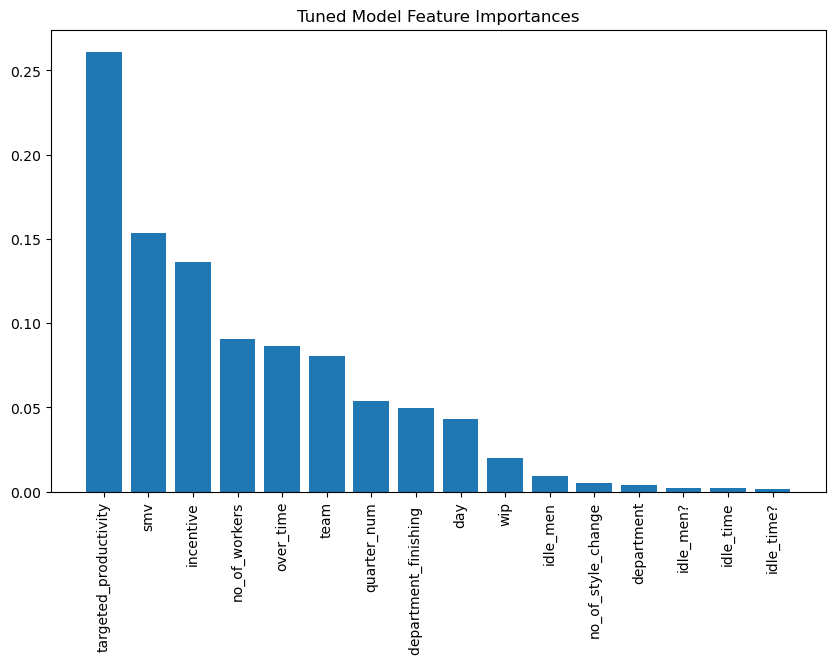

In [16]:
importances_tuned = best_rf.feature_importances_
indices_tuned = np.argsort(importances_tuned)[::-1]

# Plot the feature importances
plt.figure(figsize=(10, 6))
plt.bar(range(X.shape[1]), importances_tuned[indices_tuned], align="center")
plt.xticks(range(X.shape[1]), X.columns[indices_tuned], rotation=90)
plt.title("Feature Importances")
plt.show()

In [22]:
prediction_difference = y_pred_tuned - y_pred
print(prediction_difference)

[ 9.71365810e-02  4.41424665e-05  4.44100755e-03  1.30255046e-03
  5.79796449e-02  1.12067637e-02 -5.15381100e-02 -2.45992985e-02
  3.07363392e-02 -3.86184346e-02 -4.24104828e-02 -1.17700326e-02
 -4.18634234e-04 -1.40326284e-02 -7.51406320e-03  5.71274517e-03
 -1.80428045e-03  2.21488270e-02  5.54175683e-04  1.58015177e-02
 -2.33071715e-02 -2.78732248e-04  9.88930237e-03  1.27278610e-02
 -1.50827848e-03  5.57019804e-02 -3.02890213e-03  3.64498132e-04
  9.47377807e-04 -2.07143125e-02  3.74522195e-03 -4.47196789e-03
  1.06544092e-02 -2.53984498e-02  9.52003236e-02  1.56833038e-02
 -2.15139943e-03 -8.89548491e-03 -3.94478751e-03  1.91730500e-02
 -9.35476983e-03  1.31967319e-01  1.17435044e-02 -3.62774018e-03
 -6.47652858e-03 -4.15581713e-03 -4.44124523e-03  6.73871948e-02
  3.40350583e-02  2.97110384e-02  2.98621630e-02  9.68021033e-03
 -1.05107405e-02  3.52521259e-03 -2.53758434e-03  5.12105665e-05
  3.50739098e-03  4.65428693e-03 -1.59804603e-02 -4.47926761e-02
  1.06515455e-03 -9.35826

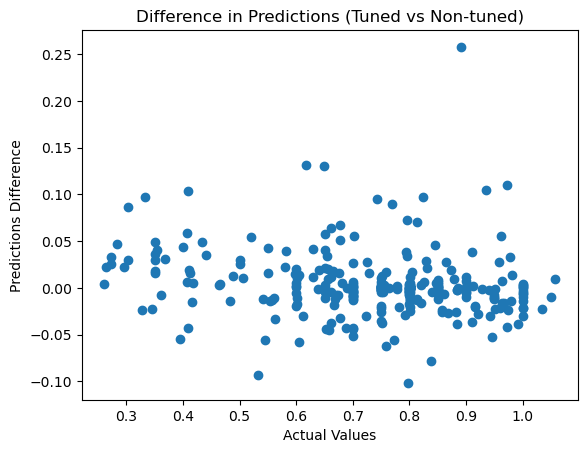

In [23]:
plt.scatter(y_test, prediction_difference, alpha=1)
plt.xlabel("Actual Values")
plt.ylabel("Predictions Difference")
plt.title("Difference in Predictions (Tuned vs Non-tuned)")
plt.show()